In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"ca9f2e0da8738a487deeb7c35dd7ffbb"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d shivam17299/oral-cancer-lips-and-tongue-images

 87% 24.0M/27.7M [00:00<00:00, 51.4MB/s]
100% 27.7M/27.7M [00:00<00:00, 79.6MB/s]


In [5]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import zipfile,os
zip_lcl = '/content/oral-cancer-lips-and-tongue-images.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()

dirbase = '/tmp'

In [7]:
os.listdir('/tmp/OralCancer')

['cancer', 'non-cancer']

In [8]:
dir = os.path.join(dirbase,'OralCancer')

In [9]:
data_generator = ImageDataGenerator(
            validation_split=0.4,
            shear_range=0.2,
            fill_mode='nearest')

In [10]:
generator_latih = data_generator.flow_from_directory(
    directory=dir,
    batch_size=4,
    subset='training',
    class_mode='binary')
generator_valid = data_generator.flow_from_directory(
    directory=dir,
    batch_size=4,
    subset='validation',
    class_mode='binary')

Found 80 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [11]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512, activation='relu'),
  tensor.keras.layers.Dense(1, activation='sigmoid')
  ])

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=2,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=2,save_best_only=True)

In [17]:
history = model.fit(
    generator_latih,
    steps_per_epoch=10,
    epochs=20,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[cekmodel])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 - 17s - loss: 1.2098 - accuracy: 0.8750 - val_loss: 3.1106 - val_accuracy: 0.5000

Epoch 00001: val_accuracy did not improve from 0.80000
Epoch 2/20
10/10 - 17s - loss: 0.1298 - accuracy: 0.9000 - val_loss: 1.8539 - val_accuracy: 0.6000

Epoch 00002: val_accuracy did not improve from 0.80000
Epoch 3/20
10/10 - 17s - loss: 0.2547 - accuracy: 0.8500 - val_loss: 1.0679 - val_accuracy: 0.7500

Epoch 00003: val_accuracy did not improve from 0.80000
Epoch 4/20
10/10 - 17s - loss: 0.0930 - accuracy: 0.9750 - val_loss: 1.5203 - val_accuracy: 0.7000

Epoch 00004: val_accuracy did not improve from 0.80000
Epoch 5/20
10/10 - 17s - loss: 0.1575 - accuracy: 0.9500 - val_loss: 0.7304 - val_accuracy: 0.7000

Epoch 00005: val_accuracy did not improve from 0.80000
Epoch 6/20


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


10/10 - 17s - loss: 0.0903 - accuracy: 0.9500 - val_loss: 0.7385 - val_accuracy: 0.7000

Epoch 00006: val_accuracy did not improve from 0.80000
Epoch 7/20
10/10 - 17s - loss: 0.0469 - accuracy: 0.9750 - val_loss: 1.9352 - val_accuracy: 0.5500

Epoch 00007: val_accuracy did not improve from 0.80000
Epoch 8/20
10/10 - 17s - loss: 0.0983 - accuracy: 0.9500 - val_loss: 1.3587 - val_accuracy: 0.6000

Epoch 00008: val_accuracy did not improve from 0.80000
Epoch 9/20
10/10 - 17s - loss: 0.0290 - accuracy: 0.9750 - val_loss: 0.4967 - val_accuracy: 0.8000

Epoch 00009: val_accuracy did not improve from 0.80000
Epoch 10/20
10/10 - 17s - loss: 1.5464e-04 - accuracy: 1.0000 - val_loss: 2.3103 - val_accuracy: 0.8000

Epoch 00010: val_accuracy did not improve from 0.80000
Epoch 11/20
10/10 - 17s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9703 - val_accuracy: 0.7500

Epoch 00011: val_accuracy did not improve from 0.80000
Epoch 12/20
10/10 - 17s - loss: 0.0206 - accuracy: 0.9750 - val_loss: 1.822

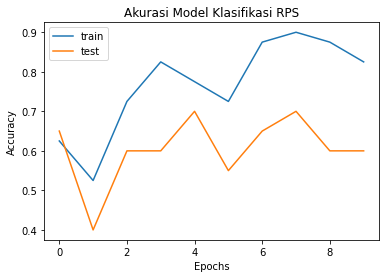

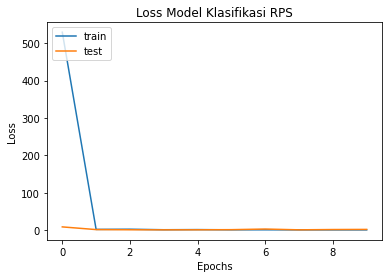

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi RPS')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save("mouth-cancer-calssification.h5")